In [17]:
import pandas as pd
# Setting up inline plotting using jupyter notebook "magic"
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
# Read below thread for plotting guides
# https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

In [18]:
# df = pd.read_csv('data.txt', header=None)
# x_mean, y_mean = df.mean()
# print(x, y)
# df[2] = df[0] - x_mean  # mean value difference: subtract mean from all input values of training set
# df[3] = df[1] - y_mean  # mean value difference: subtract mean from all output values of training set
# df[4] = df[2] ** 2  # square of mean value difference
# df[5] = df[2] * df[3]
# beta = sum(df[5])/ sum(df[4])
# alpha = y_mean - beta*x_mean
# print(alpha, beta)

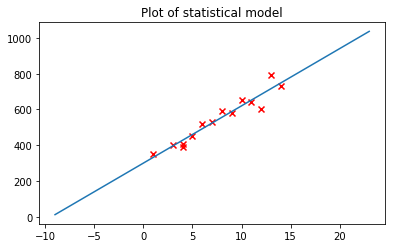

In [19]:
class StatasticalRegression(object):
    def __init__(self, dataframe_path="data.txt"):
        self.dataframe = pd.read_csv(dataframe_path, header=None)
        self.alpha, self.beta = None, None
    
    def compute_constant(self):
        x_mean, y_mean = self.dataframe.mean()
#         print("Mean X: {}\nMean Y: {}".format(x_mean, y_mean))
        self.dataframe['input_diff'] = self.dataframe[0] - x_mean  # mean value difference: subtract mean from all input values of training set
        self.dataframe['output_diff'] = self.dataframe[1] - y_mean  # mean value difference: subtract mean from all output values of training set
        self.dataframe['sqrd_input_diff'] = self.dataframe.input_diff ** 2  # square of mean value difference
        self.dataframe['mul_input_output_diff'] = self.dataframe.input_diff * self.dataframe.output_diff
#         print("Result: \n{}".format(self.dataframe))
        self.beta = sum(self.dataframe.mul_input_output_diff)/ sum(self.dataframe.sqrd_input_diff)
        self.alpha = y_mean - self.beta*x_mean
        return self.alpha, self.beta
    
    def hypothesis(self, feature, alpha=None, beta=None):
        if not (alpha and beta):
            alpha, beta = self.compute_constant()
        return (alpha + beta*feature)
    
    def add_predicted_values(self):
        self.dataframe['prediction'] = self.hypothesis(self.dataframe[0], alpha, beta)
    
    def draw_accuracy_plot(self):
        fig = plt.figure().add_axes((0.1, 0.2, 0.8, 0.7))
        x = range(min(self.dataframe[0]) - 10, max(self.dataframe[0]) + 10)
        fig.plot(x, [self.hypothesis(i, alpha, beta) for i in x])
        fig.scatter(self.dataframe[0], self.dataframe[1], marker='x', c="red")
        fig.set_title("Plot of statistical model")

s = StatasticalRegression()
alpha, beta = s.compute_constant()
s.add_predicted_values()
s.draw_accuracy_plot()

In [43]:
dataframe = pd.read_csv("data.txt", header=None)
# dataframe
dataframe['bias'] = 1  # add bias value x_0
initial_theta = np.array([1,1])  # set initial value of theta to 1,1
learning_rate = 0.1  # set learning rate alpha
hypothesis = dataframe['bias'] * initial_theta[0] + dataframe[0] * initial_theta[1]

In [51]:
sqrErrors = (hypothesis - dataframe[1]) ** 2  # mean squared error

In [54]:
cost = (1/2*len(dataframe[1])) * sum(sqrErrors)
cost

29722665.0

In [ ]:
class LinearRegression(object):
    def __init__(self, dataframe_path, initial_theta=np.array([1,1]), learning_rate=0.1):
        self.dataframe = pd.read_csv(dataframe_path, header=None)
        self.dataframe['bias'] = 1  # add bias value x_0
        self.theta = initial_theta
        self.learning_rate = learning_rate
        self.hypothesis = None
        self.traiing_set_length = len(self.dataframe[1])
    
    def hypothesis(self, *features):
        self.hypothesis = 0
        for i in self.theta:
            self.hypothesis
    
    def gradient_descent(self):
        for i in range(self.traiing_set_length):
            delta = 